<a href="https://colab.research.google.com/github/gio-bis/MLPNS2021/blob/main/scattercontoursInstructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Designed by Federica Bianco:

visualization homework

improving plots

2019 version: DSPS UDel 

In [ ]:
import pylab as pl
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
import pandas as pd
# you will use astropy to make the contours-scatter plot
from astropy import constants as const
from astropy import units as u
pylab.style.use("https://raw.githubusercontent.com/fedhere/MLPNS2021/main/fbb.mplstyle")

# high density to contours examples

## get data on  star data from kepler2 mission

In [ ]:

url = "https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI"
url +="?table=k2targets&select=epic_number,k2_teff,k2_rad"
url +="&format=CSV"



In [ ]:
df = pd.read_csv(url)
df.head()

,epic_number,k2_teff,k2_rad
0,60018365,NaN,NaN
1,60018369,NaN,NaN
2,60018371,NaN,NaN
3,60018372,NaN,NaN
4,60018374,NaN,NaN


In [ ]:
df = df.dropna(axis = 0)

In [ ]:
df.head()


,epic_number,k2_teff,k2_rad
9157,201150552,4687.0,11.26
9158,201150635,4103.0,0.46
9159,201150637,5284.0,9.08
9160,201150679,3508.0,0.23
9161,201150706,6166.0,1.30


In [ ]:
df.reset_index(inplace = True)
df

,index,epic_number,k2_teff,k2_rad
0,9157,201150552,4687.0,11.26
1,9158,201150635,4103.0,0.46
2,9159,201150637,5284.0,9.08
3,9160,201150679,3508.0,0.23
4,9161,201150706,6166.0,1.30
...,...,...,...,...
236845,298392,248888089,5300.0,0.72
236846,298396,248888126,3432.0,0.19
236847,298397,248888177,5065.0,0.63
236848,298400,248888303,3549.0,0.23


In [ ]:

df.drop('index', axis=1)

,epic_number,k2_teff,k2_rad
0,201150552,4687.0,11.26
1,201150635,4103.0,0.46
2,201150637,5284.0,9.08
3,201150679,3508.0,0.23
4,201150706,6166.0,1.30
...,...,...,...
236845,248888089,5300.0,0.72
236846,248888126,3432.0,0.19
236847,248888177,5065.0,0.63
236848,248888303,3549.0,0.23


## Add a column for the star luminosity in Watts
follow [this description](http://personal.psu.edu/mxe17/A010/lectures/lect19.html) Section 2


The luminosity of the star is $4 ~ \pi ~ r^2 ~\sigma~ T^4$
with $\sigma$ Boltzmann constand, $T$ temperature, $r$ radius of the star. 

Note that the radius is given in sun radii, use ```const.R_sun``` to get the radius in natural units instead.

In [ ]:
df["Luminosity"] = 4 * np.pi * df.k2_rad * const.R_sun * df.k2_teff**4 * const.sigma_sb
#Adding a column for luminosity in (Watts)

In [ ]:
df["LogLuminosity"] = np.log10(df["Luminosity"])

In [ ]:
df

,index,epic_number,k2_teff,k2_rad,Luminosity,LogLuminosity
0,9157,201150552,4687.0,11.26,2.693778e+18,18.430362
1,9158,201150635,4103.0,0.46,6.462603e+16,16.810408
2,9159,201150637,5284.0,9.08,3.508978e+18,18.545181
3,9160,201150679,3508.0,0.23,1.726672e+16,16.237210
4,9161,201150706,6166.0,1.30,9.315390e+17,17.969201
...,...,...,...,...,...,...
236845,298392,248888089,5300.0,0.72,2.816304e+17,17.449680
236846,298396,248888126,3432.0,0.19,1.306731e+16,16.116186
236847,298397,248888177,5065.0,0.63,2.055427e+17,17.312902
236848,298400,248888303,3549.0,0.23,1.808820e+16,16.257395


## Plot the HR diagram:

In [ ]:
df.plot.scatter?

findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.


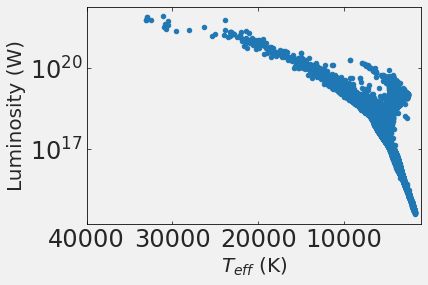

In [ ]:

df.plot.scatter("k2_teff", "Luminosity", logy = True)
plt.xlim(40000,1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)');




## Plot the HR diagram using transparency to better the readability of the plot:

In [ ]:

df.plot.scatter(.. alpha...)
plt.xlim(40000, 1000)
plt.xlabel(r'$T_{eff}$ (K)')
plt.ylabel('Luminosity (W)');


SyntaxError: ignored

## AstroML version

In [ ]:
!pip install astroML

In [ ]:

from astroML import plotting
#rememnber that you are making a log-log plot
ax = plt.figure(figsize=(10,10)).add_subplot()
plotting.scatter_contour(ax = ax, x = np.log10(df["k2_teff"]), y = np.log10(df["Luminosity"])
##plt.ylabel('log(Luminosity) (W)')
#plt.xlabel(r'$log(T_{eff})$ (K)')
#plt.xlim(4.5, 3.2)
#plt.savefig("k2scatter_contour.png"

In [ ]:
#change the contour parameters till it looks good
plt.contourf?

# by-hand version

Here is how you would do this by hand.

In [ ]:
H, xbins, ybins = np.histogram2d(np.log10(teff_na), np.log10(L_na), bins=(40, 40))
Hsort = np.sort(H.flatten())

In [ ]:
extent = #
levels = np.linspace(...)
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)
points = ax.plot(Xplot[:, 0], Xplot[:, 1], '.', ms=10, alpha=0.05, c='k')
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)


plt.xlim(4.5,3.2)
plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)');

In [ ]:
extent = #
levels = np.linspace(...)
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)
points = ax.plot(Xplot[:, 0], Xplot[:, 1], '.', ms=10, alpha=0.05, c='k')
outline = ax.contour(H.T, levels[i_min:i_min + 1],
                         linewidths=0, extent=extent)

X = np.hstack([np.log10(teff_na)[:, None], np.log10(L_na)[:, None]])

if len(outline.allsegs[0]) > 0:
    outer_poly = outline.allsegs[0][0]
    try:
        # this works in newer matplotlib versions
        from matplotlib.path import Path
        points_inside = Path(outer_poly).contains_points(X)
    except:
        # this works in older matplotlib versions
        import matplotlib.nxutils as nx
        points_inside = nx.points_inside_poly(X, outer_poly)

    Xplot = X[~points_inside]
else:
    Xplot = X

axc = contourf(H.T, extent=extent, levels=levels, 
               linewidths=3, cmap='winter', alpha=0.7)

plt.xlim(4.5,3.2)
plt.ylabel('log(Luminosity) (W)')
plt.xlabel(r'$log(T_{eff})$ (K)');